In [2]:
%load_ext rpy2.ipython

In [3]:
%%R
require(ISLR)
require(MASS)

# Linear Discriminant Analysis
lda.fit <- lda(Direction~Lag1+Lag2, data=Smarket, subset=Year<2005)
lda.fit

Loading required package: ISLR
Loading required package: MASS
Call:
lda(Direction ~ Lag1 + Lag2, data = Smarket, subset = Year < 
    2005)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544

Coefficients of linear discriminants:
            LD1
Lag1 -0.6420190
Lag2 -0.5135293


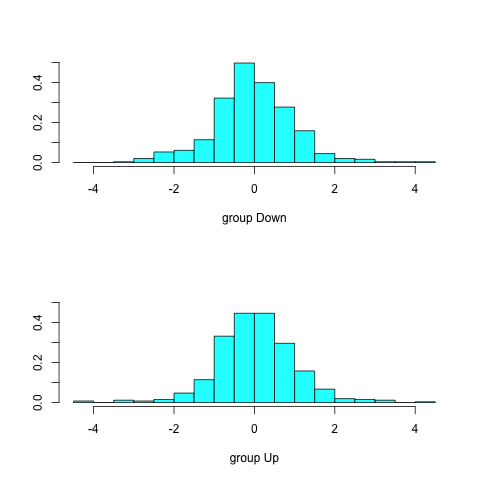

In [4]:
%%R
plot(lda.fit)

In [5]:
%%R
Smarket.2005 <- subset(Smarket, Year==2005)
lda.pred <- predict(lda.fit, Smarket.2005)
data.frame(lda.pred)[1:5,]

     class posterior.Down posterior.Up         LD1
999     Up      0.4901792    0.5098208  0.08293096
1000    Up      0.4792185    0.5207815  0.59114102
1001    Up      0.4668185    0.5331815  1.16723063
1002    Up      0.4740011    0.5259989  0.83335022
1003    Up      0.4927877    0.5072123 -0.03792892


In [6]:
%%R
table(lda.pred$class, Smarket.2005$Direction)

      
       Down  Up
  Down   35  35
  Up     76 106


In [12]:
%%R
# K nearest neighbors
library(class)
attach(Smarket)
Xlag <- cbind(Lag1, Lag2)
train <- Year<2005
knn.pred <- knn(Xlag[train,], Xlag[!train,], Direction[train], k=5)
table(knn.pred, Direction[!train])
mean(knn.pred==Direction[!train])
Xlag[train,]

The following objects are masked from Smarket (pos = 3):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year

The following objects are masked from Smarket (pos = 4):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year

The following objects are masked from Smarket (pos = 5):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year

The following objects are masked from Smarket (pos = 6):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year

The following objects are masked from Smarket (pos = 7):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year

         Lag1   Lag2
  [1,]  0.381 -0.192
  [2,]  0.959  0.381
  [3,]  1.032  0.959
  [4,] -0.623  1.032
  [5,]  0.614 -0.623
  [6,]  0.213  0.614
  [7,]  1.392  0.213
  [8,] -0.403  1.392
  [9,]  0.027 -0.403
 [10,]  1.303  0.027
 [11,]  0.287  1.303
 [12,] -0.498  0.287
 [13,] -0.189 -0.498
 [14,]  0.680 -0.189
 [15,]  0.701  0.680
 [16,] -0.562  0.701
 [17,]  0.546 -0.562
 [

In [31]:
%%R
knn.preds = list()
for (i in 1:10){
    knn.pred <- knn(Xlag[train,], Xlag[!train,], Direction[train], k=i)
    c(knn.preds, c=knn.pred)
}

In [33]:
%%R


      [,1]
 [1,] 1   
 [2,] 2   
 [3,] 3   
 [4,] 4   
 [5,] 5   
 [6,] 6   
 [7,] 7   
 [8,] 8   
 [9,] 9   
[10,] 10  
